In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

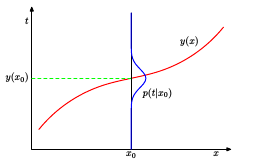

Figure.28 The regression function y(x), which minimizes the expected squared loss, is given by the mean of the conditional distri- bution p(t|x).

# Loss Functions for Regression

## Key Concepts in Regression Loss Functions

1. **Loss Function Definition**: 
   - The loss function $ L(t, y(x)) $ quantifies the discrepancy between the true target value $ t $ and the predicted value $ y(x)$. 

2. **Expected Loss**:
   - The expected loss $ E[L] $ is calculated using the joint distribution $ p(x, t) $:
   $$
   E[L] = \int \int L(t, y(x)) p(x, t) \, dx \, dt
   $$

3. **Squared Loss**:
   - A common choice for the loss function is the squared loss:
   $$
   L(t, y(x)) = (y(x) - t)^2
   $$
   - This leads to the expected loss:
   $$
   E[L] = \int \int (y(x) - t)^2 p(x, t) \, dx \, dt
   $$

4. **Minimizing Expected Loss**:
   - To minimize the expected loss, the calculus of variations is used:
   $$
   \frac{\delta E[L]}{\delta y(x)} = 0
   $$
   - This results in the optimal regression function being the conditional expectation:
   $$
   y(x) = E[t|x]
   $$

5. **Conditional Average**:
   - The regression function $ y(x) $ is the conditional average of $ t $ given $ x $. This is graphically illustrated in the provided Figure.

6. **Multiple Target Variables**:
   - The same principle extends to multiple target variables, where the optimal solution is still the conditional average.

7. **Alternative Loss Functions**:
   - While squared loss is commonly used, it may not always be appropriate, especially in multimodal distributions. 
   - An example of a generalized loss function is the Minkowski loss:
   $$
   E[L_q] = \int \int |y(x) - t|^q p(x, t) \, dx \, dt
   $$
   - The expected loss reduces to squared loss for \( q = 2 \), and the optimal predictions correspond to:
     - Conditional mean for $ q = 2 $
     - Conditional median for $ q = 1 $
     - Conditional mode as $ q $ approaches 0.

## Approaches to Regression

Three distinct approaches to solving regression problems are outlined:

1. **Full Density Approach**: 
   - Determine the joint density $ p(x, t) $, derive the conditional density $ p(t|x) $, and then find the conditional mean.

2. **Conditional Density Approach**: 
   - Directly solve for $ p(t|x) $ and then find the conditional mean.

3. **Direct Regression Approach**: 
   - Derive the regression function $ y(x) $ directly from training data.

## Conclusion

The choice of loss function in regression analysis is critical, as different loss functions can lead to varying results, especially in contexts where the target distribution is complex or multimodal. Understanding these implications is essential for effective regression modeling.


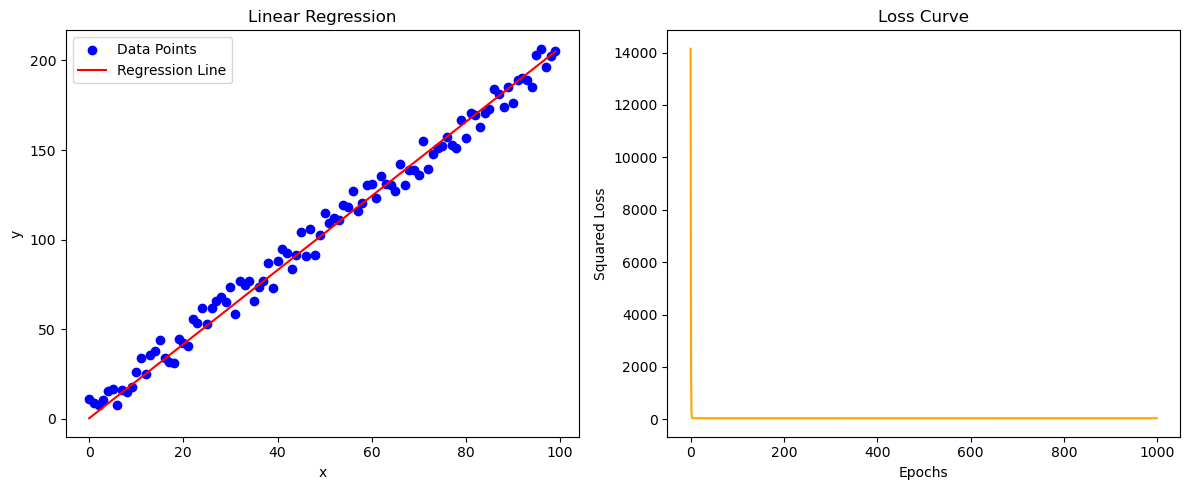

In [2]:
# Importing necessary library for plotting
import matplotlib.pyplot as plt

# Generate synthetic data for demonstration
def generate_data(num_points=100):
    """Generate synthetic linear data with noise."""
    import random
    x = [i for i in range(num_points)]
    # y = mx + b + noise
    y = [2 * i + 5 + random.uniform(-10, 10) for i in x]  # y = 2x + 5 + noise
    return x, y

# Calculate squared loss
def squared_loss(y_true, y_pred):
    """Calculate the squared loss between true and predicted values."""
    return sum((y_t - y_p) ** 2 for y_t, y_p in zip(y_true, y_pred)) / len(y_true)

# Linear regression model using gradient descent
def linear_regression_gradient_descent(x, y, learning_rate=0.0001, epochs=1000):
    """Perform linear regression using gradient descent."""
    m = 0  # slope
    b = 0  # intercept
    n = len(y)

    # Store the loss for plotting
    losses = []

    for _ in range(epochs):
        # Predictions
        y_pred = [m * x_i + b for x_i in x]
        
        # Calculate loss
        loss = squared_loss(y, y_pred)
        losses.append(loss)

        # Calculate gradients
        dm = (-2 / n) * sum(x_i * (y_t - y_p) for x_i, y_t, y_p in zip(x, y, y_pred))
        db = (-2 / n) * sum(y_t - y_p for y_t, y_p in zip(y, y_pred))

        # Update parameters
        m -= learning_rate * dm
        b -= learning_rate * db

    return m, b, losses

# Plotting the results
def plot_results(x, y, m, b, losses):
    """Plot the data points, regression line, and loss curve."""
    plt.figure(figsize=(12, 5))

    # Subplot for the regression line
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, color='blue', label='Data Points')
    plt.plot(x, [m * i + b for i in x], color='red', label='Regression Line')
    plt.title('Linear Regression')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    # Subplot for the loss curve
    plt.subplot(1, 2, 2)
    plt.plot(losses, color='orange')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Squared Loss')
    
    plt.tight_layout()
    plt.show()

# Main execution
x, y = generate_data(100)  # Generate synthetic data
m, b, losses = linear_regression_gradient_descent(x, y)  # Train model
plot_results(x, y, m, b, losses)  # Plot results


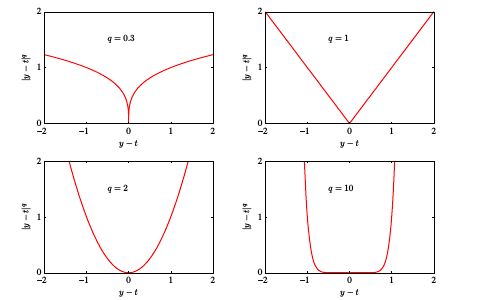

Fig.29 Plots of the quantity Lq = |y − t|q for various values of q.

##  Information Theory

In this chapter, we have discussed a variety of concepts from probability theory and decision theory that will form the foundations for much of the subsequent discussion in this book. We close this chapter by introducing some additional concepts from the field of information theory, which will also prove useful in our development of pattern recognition and machine learning techniques. Again, we shall focus only on the key concepts, and we refer the reader elsewhere for more detailed discussions (Viterbi and Omura, 1979; Cover and Thomas, 1991; MacKay, 2003).

We begin by considering a discrete random variable $ x $ and we ask how much information is received when we observe a specific value for this variable. The amount of information can be viewed as the ‘degree of surprise’ on learning the value of $ x $. If we are told that a highly improbable event has just occurred, we will have received more information than if we were told that some very likely event has just occurred, and if we knew that the event was certain to happen, we would receive no information.

Our measure of information content will therefore depend on the probability distribution $ p(x) $, and we therefore look for a quantity $ h(x) $ that is a monotonic function of the probability $ p(x) $ and that expresses the information content. The form of $ h(\cdot) $ can be found by noting that if we have two events $ x $ and $ y $ that are unrelated, then the information gain from observing both of them should be the sum of the information gained from each of them separately, so that 

$$
h(x, y) = h(x) + h(y).
$$

Two unrelated events will be statistically independent and so 

$$
p(x, y) = p(x)p(y).
$$

From these two relationships, it is easily shown that 

$$
h(x) = -\log_2 p(x) \quad (1.92)
$$ 

where the negative sign ensures that information is positive or zero. Note that low probability events $ x $ correspond to high information content. The choice of basis for the logarithm is arbitrary, and for the moment we shall adopt the convention prevalent in information theory of using logarithms to the base of 2. In this case, as we shall see shortly, the units of $ h(x) $ are bits (‘binary digits’).

Now suppose that a sender wishes to transmit the value of a random variable to a receiver. The average amount of information that they transmit in the process is obtained by taking the expectation of (1.92) with respect to the distribution $ p(x) $ and is given by 

$$
H[x] = -\sum_{x} p(x) \log_2 p(x) \quad (1.93)
$$ 

This important quantity is called the entropy of the random variable $ x $. Note that 

$$
\lim_{p \to 0} p \ln p = 0
$$ 

and so we shall take $ p(x) \ln p(x) = 0 $ whenever we encounter a value for $ x $ such that $ p(x) = 0 $. So far we have given a rather heuristic motivation for the definition of information.


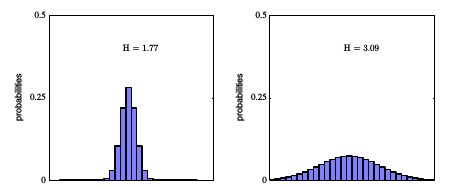

Fig.30 Histograms of two probability distributions over 30 bins illustrating the higher value of the entropy H for the broader distribution. The largest entropy would arise from a uniform distribution that would give H = − ln(1/30) = 3.40.

## Information Theory (Continued)

In the previous discussion, we introduced the definition of information (1.92) and the corresponding entropy (1.93). We now show that these definitions indeed possess useful properties.

Consider a random variable \( x \) having 8 possible states, each of which is equally likely. In order to communicate the value of \( x \) to a receiver, we would need to transmit a message of length 3 bits. Notice that the entropy of this variable is given by 

$$
H[x] = -\frac{1}{8} \log_2 \frac{1}{8} = 3 \text{ bits}.
$$ 

Now consider an example (Cover and Thomas, 1991) of a variable having 8 possible states \( \{a, b, c, d, e, f, g, h\} \) for which the respective probabilities are given by 

$$ 
\left( \frac{1}{2}, \frac{1}{4}, \frac{1}{8}, \frac{1}{16}, \frac{1}{64}, \frac{1}{64}, \frac{1}{64}, \frac{1}{64} \right).
$$ 

The entropy in this case is given by 

$$
H[x] = -\left( \frac{1}{2} \log_2 \frac{1}{2} + \frac{1}{4} \log_2 \frac{1}{4} + \frac{1}{8} \log_2 \frac{1}{8} + \frac{1}{16} \log_2 \frac{1}{16} + 4 \times \frac{1}{64} \log_2 \frac{1}{64} \right) = 2 \text{ bits}.
$$ 

We see that the nonuniform distribution has a smaller entropy than the uniform one, and we shall gain some insight into this shortly when we discuss the interpretation of entropy in terms of disorder. For the moment, let us consider how we would transmit the identity of the variable’s state to a receiver.

We could do this, as before, using a 3-bit number. However, we can take advantage of the nonuniform distribution by using shorter codes for the more probable events, at the expense of longer codes for the less probable events, in the hope of getting a shorter average code length. This can be done by representing the states $ \{a, b, c, d, e, f, g, h\} $ using, for instance, the following set of code strings: $ 0, 10, 110, 1110, 111100, 111101, 111110, 111111 $. The average length of the code that has to be transmitted is then 

$$
\text{average code length} = \frac{1}{2} \times 1 + \frac{1}{4} \times 2 + \frac{1}{8} \times 3 + \frac{1}{16} \times 4 + 4 \times \frac{1}{64} \times 6 = 2 \text{ bits}.
$$ 

This again is the same as the entropy of the random variable. Note that shorter code strings cannot be used because it must be possible to disambiguate a concatenation of such strings into its component parts. For instance, $ 11001110 $ decodes uniquely into the state sequence $ c, a, d $. This relation between entropy and shortest coding length is a general one.

The **noiseless coding theorem** (Shannon, 1948) states that the entropy is a lower bound on the number of bits needed to transmit the state of a random variable. From now on, we shall switch to the use of natural logarithms in defining entropy, as this will provide a more convenient link with ideas elsewhere in this book. In this case, the entropy is measured in units of ‘nats’ instead of bits, which differ simply by a factor of $ \ln 2 $.

We have introduced the concept of entropy in terms of the average amount of information needed to specify the state of a random variable. In fact, the concept of entropy has much earlier origins in physics where it was introduced in the context of equilibrium thermodynamics and later given a deeper interpretation as a measure of disorder through developments in statistical mechanics.

We can understand this alternative view of entropy by considering a set of $ N $ identical objects that are to be divided amongst a set of bins, such that there are $ n_i $ objects in the $ i $-th bin. Consider the number of different ways of allocating the objects to the bins. There are $ N $ ways to choose the first object, $ (N - 1) $ ways to choose the second object, and so on, leading to a total of $ N! $ ways to allocate all $ N $ objects to the bins, where $ N! $ (pronounced ‘factorial $ N $’) denotes the product $ N \times (N - 1) \times \cdots \times 2 \times 1 $.

However, we don’t wish to distinguish between rearrangements of objects within each bin. In the $ i $-th bin, there are $ n_i! $ ways of reordering the objects, and so the total number of ways of allocating the $ N $ objects to the bins is given by 

$$
W = \frac{N!}{\prod_{i} n_i!} \quad (1.94)
$$ 

which is called the multiplicity. The entropy is then defined as the logarithm of the multiplicity scaled by an appropriate constant:

$$
H = \frac{1}{N} \ln W = \frac{1}{N} \left( \ln N! - \sum_{i} \ln n_i! \right) \quad (1.95)
$$ 

We now consider the limit $ N \to \infty $, in which the fractions $ \frac{n_i}{N} $ are held fixed, and apply Stirling’s approximation:

$$
\ln N! \approx N \ln N - N \quad (1.96)
$$ 

which gives 

$$
H = - \lim_{N \to \infty} \frac{1}{N} \sum_{i} n_i \ln \frac{n_i}{N} = - \sum_{i} p_i \ln p_i \quad (1.97)
$$ 

where we have used $ \sum_{i} n_i = N $. Here $ p_i = \lim_{N \to \infty} \left( \frac{n_i}{N} \right) $ is the probability of an object being assigned to the $ i $-th bin. In physics terminology, the specific arrangements of objects in the bins are called a **microstate**, and the overall distribution of occupation numbers, expressed through the ratios $ \frac{n_i}{N} $, is called a **macrostate**. The multiplicity 4 W $ is also known as the weight of the macrostate.

We can interpret the bins as the states $ x_i $ of a discrete random variable $ X $, where $ p(X = x_i) = p_i $. The entropy of the random variable $ X $ is then given by 

$$
H[p] = -\sum_{i} p(x_i) \ln p(x_i) \quad (1.98)
$$ 

Distributions $ p(x_i) $ that are sharply peaked around a few values will have a relatively low entropy, whereas those that are spread more evenly across many values will have higher entropy. Because $ 0 \leq p_i \leq 1 $, the entropy is nonnegative, and it will equal its minimum value of 0 when one of the $ p_i = 1 $ and all other $ p_j \neq i = 0 $.

The maximum entropy configuration can be found by maximizing $ H $ using a Lagrange multiplier to enforce the normalization constraint on the probabilities. Thus we maximize 

$$
H' = -\sum_{i} p(x_i) \ln p(x_i) + \lambda \left( \sum_{i} p(x_i) - 1 \right) \quad (1.99)
$$


In [3]:
import math

def calculate_entropy(probabilities):
    """
    Calculate the entropy of a discrete random variable.
    
    Parameters:
    probabilities (list): A list of probabilities for the random variable.
    
    Returns:
    float: The entropy of the random variable.
    """
    # Ensure that the probabilities sum to 1
    if not math.isclose(sum(probabilities), 1.0):
        raise ValueError("The sum of probabilities must be 1.")
    
    entropy = 0
    for p in probabilities:
        if p > 0:  # Avoid log(0)
            entropy -= p * math.log(p)  # Using natural logarithm
    return entropy

# Example usage
if __name__ == "__main__":
    # Example probabilities for a discrete random variable with 8 states
    probabilities = [1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/64, 1/64]
    
    entropy = calculate_entropy(probabilities)
    print(f"Entropy of the random variable: {entropy:.4f} nats")


Entropy of the random variable: 1.3863 nats


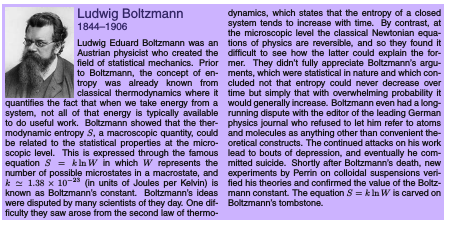

From which we find that all of the $ p(x_i) $ are equal and are given by $ p(x_i) = \frac{1}{M} $, where $ M $ is the total number of states $ x_i $. The corresponding value of the entropy is then $ H = \ln M $. This result can also be derived from Jensen’s inequality (to be discussed shortly). To verify that the stationary point is indeed a maximum, we can evaluate the second derivative of the entropy, which gives 

$$
\frac{\partial^2 H}{\partial p(x_i) \partial p(x_j)} = -I_{ij}
$$

where \( I_{ij} \) are the elements of the identity matrix.

We can extend the definition of entropy to include distributions $ p(x) $ over continuous variables $ x $ as follows. First, divide $ x $ into bins of width $ \Delta $. Then, assuming $ p(x) $ is continuous, the mean value theorem (Weisstein, 1999) tells us that, for each such bin, there must exist a value $ x_i $ such that 

$$
\int_{i\Delta}^{(i+1)\Delta} p(x) \, dx = p(x_i) \Delta.
$$

We can now quantize the continuous variable $ x $ by assigning any value $ x $ to the value $ x_i $ whenever $ x $ falls in the $ i $-th bin. The probability of observing the value $ x_i $ is then $ p(x_i) \Delta $. This gives a discrete distribution for which the entropy takes the form 

$$
H_\Delta = - \sum_i p(x_i) \Delta \ln (p(x_i) \Delta) = - \sum_i p(x_i) \Delta \ln p(x_i) - \ln \Delta.
$$

where we have used $ \sum_i p(x_i) \Delta = 1 $, which follows from the previous equation. We now omit the second term $ - \ln \Delta $ on the right-hand side and then consider the limit $ \Delta \to 0 $. The first term on the right-hand side of the previous equation will approach the integral of $ p(x) \ln p(x) $ in this limit so that 

$$
\lim_{\Delta \to 0} \sum_i p(x_i) \Delta \ln p(x_i) = - \int p(x) \ln p(x) \, dx.
$$

The quantity on the right-hand side is called the differential entropy. We see that the discrete and continuous forms of the entropy differ by a quantity $ \ln \Delta $, which diverges in the limit $ \Delta \to 0 $. This reflects the fact that specifying a continuous variable very precisely requires a large number of bits. For a density defined over multiple continuous variables, denoted collectively by the vector $ \mathbf{x} $, the differential entropy is given by 

$$
H[\mathbf{x}] = - \int p(\mathbf{x}) \ln p(\mathbf{x}) \, d\mathbf{x}.
$$

In the case of discrete distributions, we saw that the maximum entropy configuration corresponded to an equal distribution of probabilities across the possible states of the variable. Let us now consider the maximum entropy configuration for a continuous variable. In order for this maximum to be well-defined, it will be necessary to constrain the first and second moments of $ p(x) $ as well as preserving the normalization constraint. We therefore maximize the differential entropy with the three constraints 

$$
\int_{-\infty}^{\infty} p(x) \, dx = 1,
$$

$$
\int_{-\infty}^{\infty} x p(x) \, dx = \mu,
$$

$$
\int_{-\infty}^{\infty} (x - \mu)^2 p(x) \, dx = \sigma^2.
$$

The constrained maximization can be performed using Lagrange multipliers so that we maximize the following functional with respect to \( p(x) \) 

$$
\mathcal{L} = - \int p(x) \ln p(x) \, dx + \lambda_1 \int p(x) \, dx - 1 + \lambda_2 \int x p(x) \, dx - \mu + \lambda_3 \int (x - \mu)^2 p(x) \, dx - \sigma^2.
$$

Using the calculus of variations, we set the derivative of this functional to zero, giving 

$$
p(x) = \exp(-1 + \lambda_1 + \lambda_2 x + \lambda_3 (x - \mu)^2).
$$

The Lagrange multipliers can be found by back substitution of this result into the three constraint equations, leading finally to the result 

$$
p(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right),
$$

and so the distribution that maximizes the differential entropy is the Gaussian. Note that we did not constrain the distribution to be nonnegative when we maximized the entropy. However, because the resulting distribution is indeed nonnegative, we see with hindsight that such a constraint is not necessary. If we evaluate the differential entropy of the Gaussian, we obtain 

$$
H[\mathbf{x}] = \frac{1}{2} + \ln(2\pi\sigma^2).
$$

Thus, we see again that the entropy increases as the distribution becomes broader, i.e., as $ \sigma^2 $ increases. This result also shows that the differential entropy, unlike the discrete entropy, can be negative, because $ H(x) < 0 $ in the previous equation for $ \sigma^2 < \frac{1}{2\pi e} $.

Suppose we have a joint distribution $ p(x, y) $ from which we draw pairs of values of $ x $ and $ y $. If a value of $ x $ is already known, then the additional information needed to specify the corresponding value of $ y $ is given by 

$$
- \ln p(y|x).
$$

Thus, the average additional information needed to specify \( y \) can be written as 

$$
H[y|x] = - \int \int p(y, x) \ln p(y|x) \, dy \, dx.
$$


In [8]:
import math
from collections import Counter
import numpy as np

def factorial(n):
    """Compute factorial using iterative method to avoid recursion limit."""
    if n == 0 or n == 1:
        return 1
    result = 1
    for i in range(2, n + 1):
        result *= i
    return result

def multiplicity(N, n_bins):
    """Calculate multiplicity W based on N and number of objects in each bin."""
    total_factorial = factorial(N)
    bin_factorials = np.prod([factorial(n) for n in n_bins])
    return total_factorial / bin_factorials

def entropy(n_bins):
    """Calculate the entropy H based on the distribution of objects in bins."""
    N = sum(n_bins)
    if N == 0:
        return 0

    W = multiplicity(N, n_bins)
    return math.log(W)

def entropy_stirling(n_bins):
    """Calculate entropy using Stirling's approximation."""
    N = sum(n_bins)
    if N == 0:
        return 0

    # Using Stirling's approximation
    entropy_value = N * math.log(N) - N  # ln(N!)
    for n in n_bins:
        if n > 0:
            entropy_value -= n * math.log(n) - n  # ln(n!)
    return entropy_value

def main():
    # Example usage
    n_bins = [10, 20, 30]  # Example distribution of objects in bins
    N = sum(n_bins)
    
    print("Number of objects (N):", N)
    print("Multiplicity (W):", multiplicity(N, n_bins))
    print("Entropy (H) using direct computation:", entropy(n_bins))
    print("Entropy (H) using Stirling's approximation:", entropy_stirling(n_bins))

if __name__ == "__main__":
    main()


Number of objects (N): 60
Multiplicity (W): 3.553261127084985e+24
Entropy (H) using direct computation: 56.529908041012426
Entropy (H) using Stirling's approximation: 60.68425588244112


In [9]:
import numpy as np
import scipy.integrate as spi

def gaussian_distribution(x, mu, sigma):
    """Return the value of the Gaussian distribution at point x."""
    coefficient = 1 / (np.sqrt(2 * np.pi * sigma**2))
    exponent = -((x - mu)**2) / (2 * sigma**2)
    return coefficient * np.exp(exponent)

def differential_entropy(mu, sigma):
    """Calculate the differential entropy of the Gaussian distribution."""
    return 0.5 * (1 + np.log(2 * np.pi * sigma**2))

def additional_information(y, x, mu, sigma):
    """Calculate the additional information needed to specify y given x."""
    p_y_given_x = gaussian_distribution(y, mu, sigma)
    return -np.log(p_y_given_x)

def compute_additional_information(mu, sigma, num_samples=1000):
    """Compute the average additional information needed for y given x."""
    # Sample values for y and x
    y_values = np.linspace(mu - 4*sigma, mu + 4*sigma, num_samples)
    x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, num_samples)
    
    total_info = 0
    for x in x_values:
        # Compute average additional information for a fixed x
        info = spi.simps([additional_information(y, x, mu, sigma) for y in y_values], y_values)
        total_info += info

    average_info = total_info / num_samples
    return average_info

def main():
    # Parameters for the Gaussian distribution
    mu = 0.0   # Mean
    sigma = 1.0  # Standard deviation
    
    # Calculate differential entropy
    H = differential_entropy(mu, sigma)
    print("Differential Entropy H[x]:", H)
    
    # Compute average additional information
    avg_info = compute_additional_information(mu, sigma)
    print("Average additional information needed to specify y given x:", avg_info)

if __name__ == "__main__":
    main()


Differential Entropy H[x]: 1.4189385332046727
Average additional information needed to specify y given x: 28.684841641766134


Differential Entropy: 1.4189


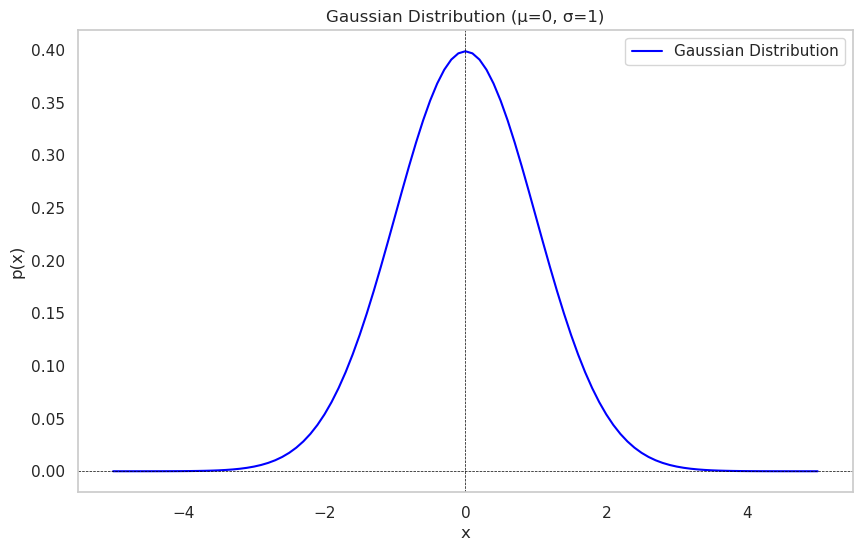

In [10]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compute Gaussian distribution
def gaussian(x, mu, sigma):
    coeff = 1 / math.sqrt(2 * math.pi * sigma ** 2)
    exponent = -((x - mu) ** 2) / (2 * sigma ** 2)
    return coeff * math.exp(exponent)

# Function to compute differential entropy of a Gaussian distribution
def differential_entropy(sigma):
    return 0.5 * (1 + math.log(2 * math.pi * sigma ** 2))

# Generate values for plotting
mu = 0  # Mean
sigma = 1  # Standard deviation
x_values = [i * 0.1 for i in range(-50, 51)]  # Range from -5 to 5
y_values = [gaussian(x, mu, sigma) for x in x_values]  # Gaussian values

# Calculate and print the differential entropy
entropy = differential_entropy(sigma)
print(f"Differential Entropy: {entropy:.4f}")

# Plot the Gaussian distribution
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x=x_values, y=y_values, label='Gaussian Distribution', color='blue')
plt.title('Gaussian Distribution (μ=0, σ=1)')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()


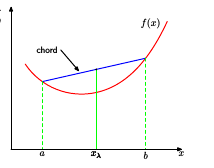

Fig. 31 A convex function f (x) is one for which ev- ery chord (shown in blue) lies on or above the function (shown in red).


which is called the conditional entropy of $ y $ given $ x $. It is easily seen, using the product rule, that the conditional entropy satisfies the relation 

$$
H[x, y] = H[y|x] + H[x] \tag{1.112}
$$

where $ H[x, y] $ is the differential entropy of $ p(x, y) $ and $ H[x] $ is the differential entropy of the marginal distribution $ p(x) $. Thus, the information needed to describe $ x $ and $ y $ is given by the sum of the information needed to describe $ x $ alone plus the additional information required to specify $ y $ given $ x $.

### Relative Entropy and Mutual Information

So far in this section, we have introduced a number of concepts from information theory, including the key notion of entropy. We now start to relate these ideas to pattern recognition. Consider some unknown distribution $ p(x) $, and suppose that we have modeled this using an approximating distribution $ q(x) $. If we use $ q(x) $ to construct a coding scheme for the purpose of transmitting values of $ x $ to a receiver, then the average additional amount of information (in nats) required to specify the value of $ x $ (assuming we choose an efficient coding scheme) as a result of using $ q(x) $ instead of the true distribution $ p(x) $ is given by 

$$
KL(p \| q) = - \int p(x) \ln q(x) \, dx - \int p(x) \ln p(x) \, dx + \int p(x) \ln p(x) \, dx = - \int p(x) \ln \frac{p(x)}{q(x)} \, dx \tag{1.113}
$$

This is known as the relative entropy or Kullback-Leibler divergence, or KL divergence (Kullback and Leibler, 1951), between the distributions $ p(x) $ and $ q(x) $. Note that it is not a symmetrical quantity, that is to say 

$$
KL(p \| q) \neq KL(q \| p).
$$

We now show that the Kullback-Leibler divergence satisfies 

$$
KL(p \| q) \geq 0 
$$

with equality if, and only if, $ p(x) = q(x) $. To do this, we first introduce the concept of convex functions. A function $ f(x) $ is said to be convex if it has the property that every chord lies on or above the function, as shown in Figure.31. Any value of $ x $ in the interval from $ x = a $ to $ x = b $ can be written in the form 

$$
x = \lambda a + (1 - \lambda) b \quad \text{where} \quad 0 \leq \lambda \leq 1.
$$

The corresponding point on the chord is given by 

$$
\lambda f(a) + (1 - \lambda) f(b),
$$

and the corresponding value of the function is 

$$
f(\lambda a + (1 - \lambda) b).
$$

Convexity then implies 

$$
f(\lambda a + (1 - \lambda) b) \leq \lambda f(a) + (1 - \lambda) f(b). \tag{1.114}
$$

This is equivalent to the requirement that the second derivative of the function be everywhere positive. Examples of convex functions are $ x \ln x $ (for $ x > 0 $) and $ x^2 $. A function is called strictly convex if the equality is satisfied only for $ \lambda = 0 $ and $ \lambda = 1 $. If a function has the opposite property, namely that every chord lies on or below the function, it is called concave, with a corresponding definition for strictly concave. If a function $ f(x) $ is convex, then $ -f(x) $ will be concave.

Using the technique of proof by induction, we can show from (1.114) that a convex function $ f(x) $ satisfies 

$$
f\left(\sum_{i=1}^{M} \lambda_i x_i\right) \leq \sum_{i=1}^{M} \lambda_i f(x_i) \tag{1.115}
$$

where $ \lambda_i \geq 0 $ and $ \sum_{i=1}^{M} \lambda_i = 1 $, for any set of points $ \{x_i\} $. The result (1.115) is known as Jensen’s inequality. If we interpret the $ \lambda_i $ as the probability distribution over a discrete variable $ x $ taking the values $ \{x_i\} $, then (1.115) can be written 

$$
f(E[x]) \leq E[f(x)] \tag{1.116}
$$

where $ E[\cdot] $ denotes the expectation. For continuous variables, Jensen’s inequality takes the form 

$$
\int f(x) p(x) \, dx \geq f(E[x]) \tag{1.117}
$$

We can apply Jensen’s inequality in the form (1.117) to the Kullback-Leibler divergence (1.113) to give 

$$
KL(p \| q) = -\int p(x) \ln q(x) \, dx \geq -\ln \left( \int p(x) \, dx \right) = 0. \tag{1.118}
$$


Kullback-Leibler Divergence: 49.9500


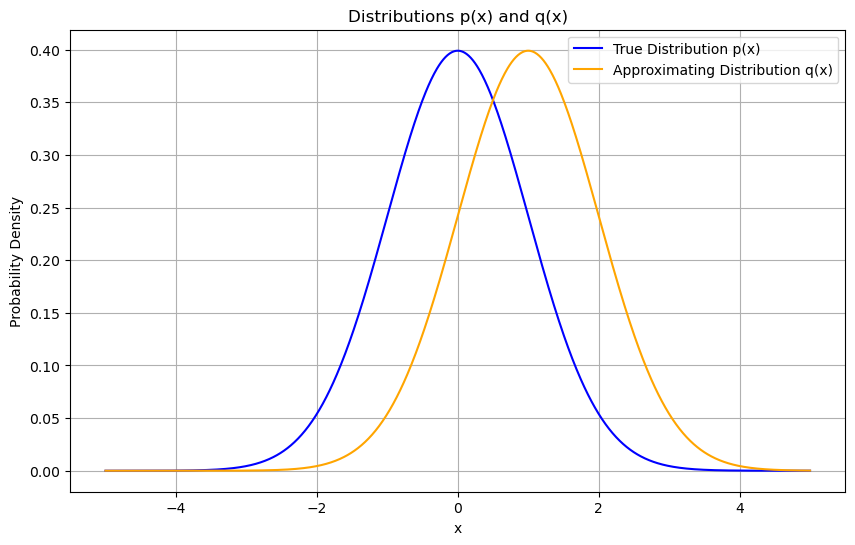

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the true distribution p(x) and the approximating distribution q(x)
def p(x):
    """True distribution (e.g., Gaussian with mean 0 and std 1)."""
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x ** 2))

def q(x):
    """Approximating distribution (e.g., Gaussian with mean 1 and std 1)."""
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - 1) ** 2))

# Calculate Kullback-Leibler divergence
def kl_divergence(p, q, x_range):
    """Calculate the Kullback-Leibler divergence between p and q."""
    # Avoid division by zero and log(0) by using a small epsilon
    epsilon = 1e-10
    p_values = p(x_range) + epsilon
    q_values = q(x_range) + epsilon
    return np.sum(p_values * np.log(p_values / q_values))

# Define the range of x values
x_range = np.linspace(-5, 5, 1000)

# Compute the KL divergence
kl_value = kl_divergence(p, q, x_range)
print(f"Kullback-Leibler Divergence: {kl_value:.4f}")

# Plotting the distributions
plt.figure(figsize=(10, 6))
plt.plot(x_range, p(x_range), label='True Distribution p(x)', color='blue')
plt.plot(x_range, q(x_range), label='Approximating Distribution q(x)', color='orange')
plt.title('Distributions p(x) and q(x)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()


Where we have used the fact that 

$$
-\ln x
$$ 

is a convex function, together with the normalization condition 

$$
\int q(x) \, dx = 1.
$$ 

In fact, $-\ln x$ is a strictly convex function, so the equality will hold if and only if $q(x) = p(x)$ for all $x$. Thus, we can interpret the Kullback-Leibler divergence as a measure of the dissimilarity of the two distributions $p(x)$ and $q(x)$. 

We see that there is an intimate relationship between data compression and density estimation (i.e., the problem of modeling an unknown probability distribution) because the most efficient compression is achieved when we know the true distribution. If we use a distribution that is different from the true one, then we must necessarily have a less efficient coding, and on average, the additional information that must be transmitted is (at least) equal to the Kullback-Leibler divergence between the two distributions. 

Suppose that data is being generated from an unknown distribution $p(x)$ that we wish to model. We can try to approximate this distribution using some parametric distribution $q(x|\theta)$, governed by a set of adjustable parameters $\theta$, for example, a multivariate Gaussian. One way to determine $\theta$ is to minimize the Kullback-Leibler divergence between $p(x)$ and $q(x|\theta)$ with respect to $\theta$. We cannot do this directly because we don’t know $p(x)$. 

Suppose, however, that we have observed a finite set of training points $x_n$, for $n = 1, \ldots, N$, drawn from $p(x)$. Then the expectation with respect to $p(x)$ can be approximated by a finite sum over these points, using 

$$
KL(p \| q) \approx \sum_{n=1}^{N} \left\{-\ln q(x_n | \theta) + \ln p(x_n)\right\}. \tag{1.119}
$$

The second term on the right-hand side of (1.119) is independent of $\theta$, and the first term is the negative log likelihood function for $\theta$ under the distribution $q(x|\theta)$ evaluated using the training set. Thus we see that minimizing this Kullback-Leibler divergence is equivalent to maximizing the likelihood function. 

Now consider the joint distribution between two sets of variables $x$ and $y$ given by $p(x, y)$. If the sets of variables are independent, then their joint distribution will factorize into the product of their marginals 

$$
p(x, y) = p(x)p(y).
$$ 

If the variables are not independent, we can gain some idea of whether they are ‘close’ to being independent by considering the Kullback-Leibler divergence between the joint distribution and the product of the marginals, given by 

$$
I[x, y] \equiv KL(p(x, y) \| p(x)p(y)) = \int p(x)p(y) \left(-\ln p(x, y)\right) \, dx \, dy. \tag{1.120}
$$ 

This is called the mutual information between the variables $x$ and $y$. From the properties of the Kullback-Leibler divergence, we see that 

$$
I(x, y) \geq 0 
$$ 

with equality if and only if $x$ and $y$ are independent. 

Using the sum and product rules of probability, we see that the mutual information is related to the conditional entropy through 

$$
I[x, y] = H[y] - H[y|x] \tag{1.121}
$$ 

Thus, we can view the mutual information as the reduction in the uncertainty about $x$ by virtue of being told the value of $y$ (or vice versa). 

From a Bayesian perspective, we can view $p(x)$ as the prior distribution for $x$ and $p(x|y)$ as the posterior distribution after we have observed new data $y$. The mutual information therefore represents the reduction in uncertainty about $x$ as a consequence of the new observation $y$.


Kullback-Leibler Divergence: 49.9500


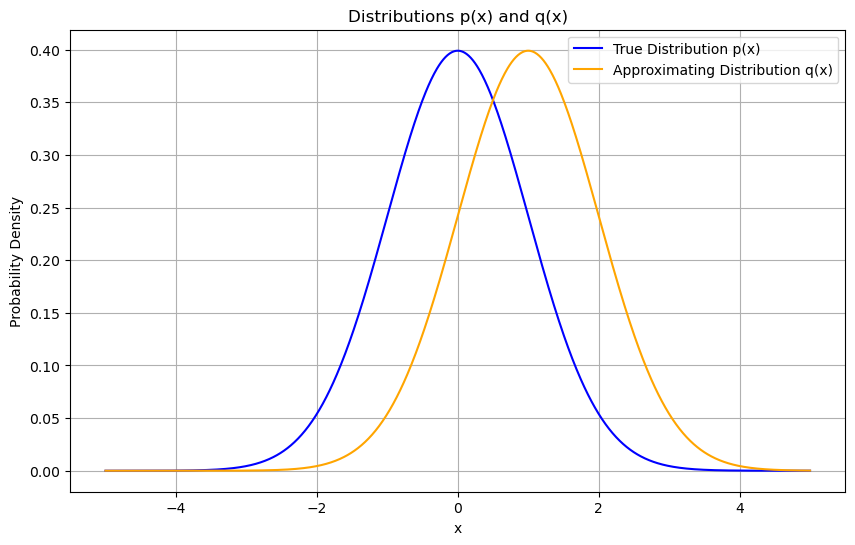

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define the true distribution p(x) and the approximating distribution q(x)
def p(x):
    """True distribution (e.g., Gaussian with mean 0 and std 1)."""
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x ** 2))

def q(x):
    """Approximating distribution (e.g., Gaussian with mean 1 and std 1)."""
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - 1) ** 2))

# Calculate Kullback-Leibler divergence
def kl_divergence(p, q, x_range):
    """Calculate the Kullback-Leibler divergence between p and q."""
    # Avoid division by zero and log(0) by using a small epsilon
    epsilon = 1e-10
    p_values = p(x_range) + epsilon
    q_values = q(x_range) + epsilon
    return np.sum(p_values * np.log(p_values / q_values))

# Define the range of x values
x_range = np.linspace(-5, 5, 1000)

# Compute the KL divergence
kl_value = kl_divergence(p, q, x_range)
print(f"Kullback-Leibler Divergence: {kl_value:.4f}")

# Plotting the distributions
plt.figure(figsize=(10, 6))
plt.plot(x_range, p(x_range), label='True Distribution p(x)', color='blue')
plt.plot(x_range, q(x_range), label='Approximating Distribution q(x)', color='orange')
plt.title('Distributions p(x) and q(x)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()
